In [8]:
## python3 -m pip install "pdfplumber"
import pdfplumber
import pandas as pd

pdf = pdfplumber.open("June 2021 AP-NORC PUF codebook.pdf")
questions = []

for i in range(4,11):

    
    page = pdf.pages[i]
    extracted = page.extract_table()

    def extract_values_with_char(list_of_lists, char):
        result = []
        for sublist in list_of_lists:
            for item in sublist:
                if isinstance(item, str) and char in item:
                    result.append(item)
        return result

    data = extracted
    char_to_find = ":"

    result = extract_values_with_char(data, char_to_find)

    questions.append(result)

# print(questions)
    
data = pd.read_csv('APNORC_june2021_PUF.csv')
methodological = ["SU_ID","FINALWT"]
variables = ["POLITICS","DEMO","REPUB","INDEP","IDEO","URBAN","MARITAL","AGEGRP","EDUCATION","RACETH","GENDER","HHINCOME","EMPSTATUS","CENSUS_REGION","SURV_MODE","SURV_LANG"]
qprovided = [col for col in data.columns if col not in variables and col not in methodological and col != "STATE"]


In [23]:
import ipywidgets
from ipywidgets import widgets

test = widgets.Dropdown(
    options= variables,
    value='POLITICS',
    description='Variables:',
    disabled=False,
)

In [43]:
prompt = "".join(["Pick a variable from the following: ",", ".join(variables)])
print(prompt)
variable = input(prompt)

Pick a variable from the following: POLITICS, DEMO, REPUB, INDEP, IDEO, URBAN, MARITAL, AGEGRP, EDUCATION, RACETH, GENDER, HHINCOME, EMPSTATUS, CENSUS_REGION, SURV_MODE, SURV_LANG


In [44]:
promptq = "".join(["Pick a question code from the following: ",", ".join(qprovided)])
print(promptq)
question = input(promptq)

Pick a question code from the following: CUR1, CUR3AB, CURY2A, CURY2B, CURY2C, CURY2D, CURY2E, CURY2F, CURY2G, B1AB, GOVTA, GOVTB, GOVTC, GOVTD, GOVTE, VIRUS2A, VIRUS2B, VIRUS6A, VIRUS6B, VIRUS6C, VIRUS6D, VIRUS7A, VIRUS7B, VIRUS7C, VIRUS7D, REOPEN1A, REOPEN1B, REOPEN1C, REOPEN1D, REOPEN1E, REOPEN1F, REOPEN1G, REOPEN1H, REOPEN1I, REOPEN1J, REOPEN2A, REOPEN2B, REOPEN2C, REOPEN2D, REOPEN2E, REOPEN2F, REOPEN2G, REOPEN2H, REOPEN2I, REOPEN2J, REOPEN3A, REOPEN3B, REOPEN4, REOPEN5, ABO1, ABO2, ABO3A, ABO3B, ABO3C, ABO3D, ABO6A, ABO6B, ABO6C, MIDEAST1A, MIDEAST1B, MIDEAST2, MIDEAST3, RELIG, BORN, VAX3, APVAX7, WAGE_1, WAGE2, WAGE3, WAGE4


ABO1
DEMO


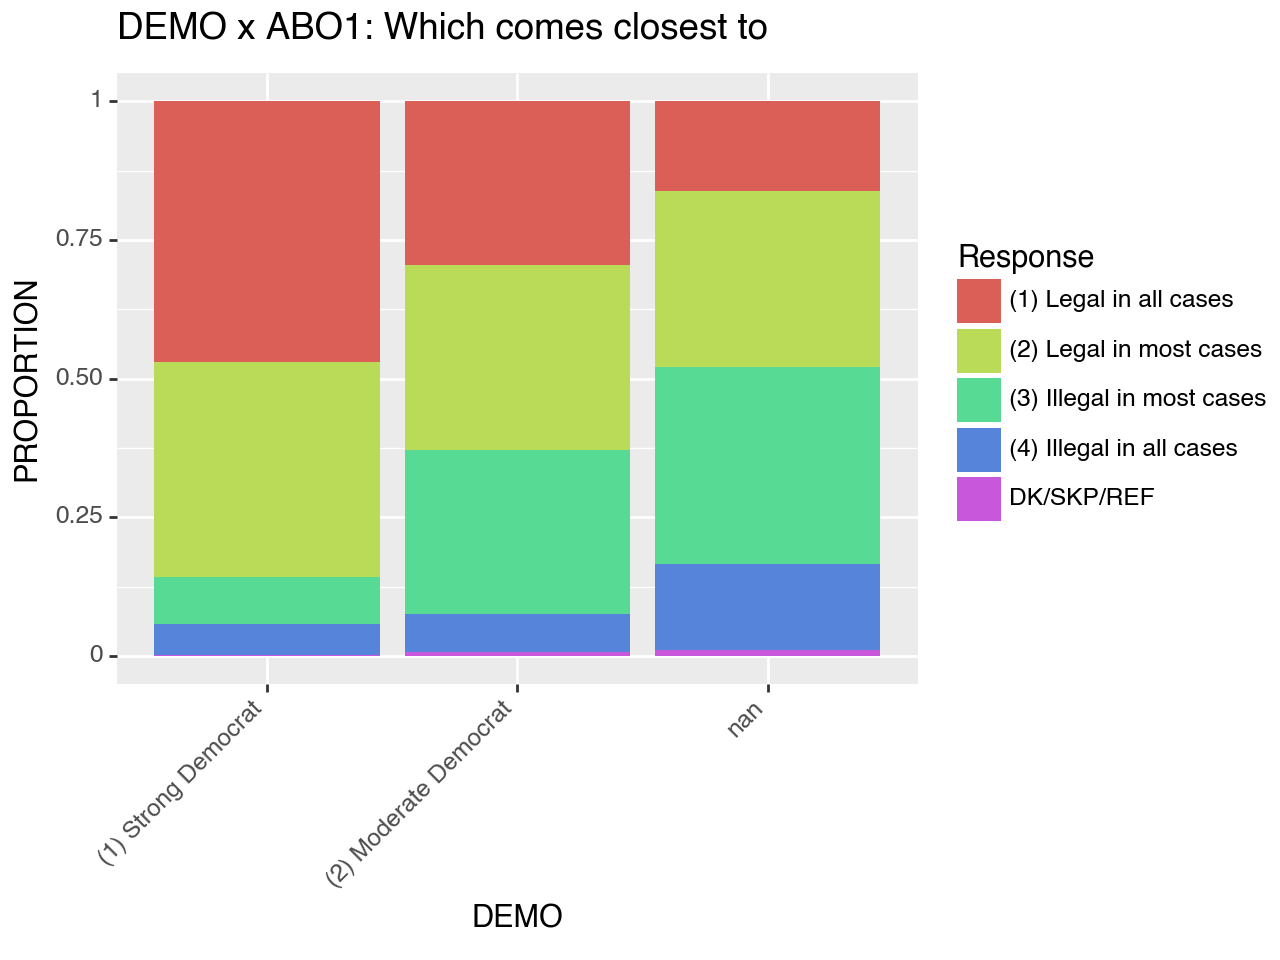

<Figure Size: (640 x 480)>

In [45]:
import plotnine
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar, labs, theme, element_text
from ipywidgets import interact

# question = "CUR1"
# variable = "POLITICS"
print(question)
print(variable)

data[variable] = data[variable].where(data[variable] != data[variable].str.upper(), "DK/SKP/REF")
data[question] = data[question].where(data[question] != data[question].str.upper(), "DK/SKP/REF")


result2 = extract_values_with_char(questions, question)
# print(result2)

(ggplot(data) + 
            aes(x = variable, y = "FINALWT", fill = question) +
            geom_bar(stat = "identity", position = "fill") +
            labs(x = variable, y = "PROPORTION", fill = "Response", title = " ".join([variable, "x", result2[0]])) +
            theme(axis_text_x=element_text(angle=45, hjust=1))
)

# print(plotxyz)